# Qubit examples 

Here we consider the simple model 

\begin{equation}
H = \frac{\Delta }{2} \sigma_{z} + \Omega \sigma_{x}
\end{equation}

with the following dissipators for Bosons and Fermions respectively
\begin{equation}
\gamma_{-} = \gamma(N + 1) \quad \gamma_{+} = \gamma N
\end{equation}
and
\begin{equation}
\gamma_{-} = \gamma(1-f) \quad \gamma_{+} = \gamma f
\end{equation}
where $N = f/(1-2f)$ is the Bose-Einstein distribution and $f$ is the Fermi-Dirac distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from FCS import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

import matplotlib

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}
matplotlib.rc('font', **font)

In [2]:
γ = 1
Ω = 1
Δ = 0
N = 0.2

sx = sigmax()
sy = sigmay()
sz = sigmaz()
sm = sigmam()
sp = sigmap()
pe = (1+sz)/2

H =0.5* Δ*sz + Ω*sx
c_ops = [np.sqrt(γ*(N+1))*sm, np.sqrt(γ*N)*sp]
e_ops = [pe]

ρ0 = steadystate(H, c_ops)
pess = expect(ρ0, sp*sm)
print(N - (2*N+1)*pess)

tf = 2000
dt = 0.001;
t = np.arange(0, tf, dt)

fock_dm(2,0)

ρ0.eigenenergies()

eigs = H.eigenenergies()



-0.4016064257028113


# Solve MEeigenenergies

In [3]:
result = photocurrent_mesolve(H, fock_dm(2,0), t, sc_ops=c_ops, e_ops=e_ops, store_measurement=True, noise=7)

J = np.real(result.measurement[0].T[0])
pet = result.expect[0]

# Get arrows
pp = np.real(result.measurement[0].T[1])*dt
pm = np.real(result.measurement[0].T[0])*dt

tps = t[pp==1]
tms = t[pm==1]

arrow_headp = np.ones(len(tps))
arrow_headm = np.zeros(len(tms))

arrow_basep = pet[pp==1]
arrow_basem = pet[pm==1]

Total run time:  21.73s


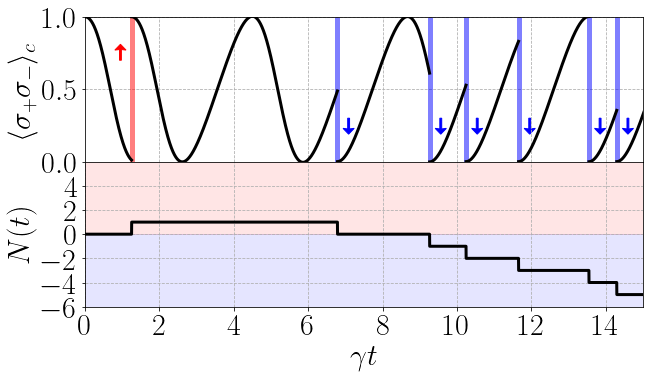

In [4]:
fig = plt.figure(figsize=(10, 8))
lw = 3
lw2 = 0.05
fs = 30
plt.subplot(3, 1,1)

# Create time windows between jumps
tfi = 15
tvs = np.sort(np.concatenate([tps, tms]))
tvs = tvs
tv0 = 0

# Arrow parameters
headw = 0.3
headl = 0.04
width = 0.05

for tvi in tvs:
    
    plt.plot(t[(tv0<t)&(t<tvi)], pet[(tv0<t)&(t<tvi)], linewidth=3, color='k', alpha=1)
    
    tv0 = tvi
    
    if tvi > tfi:
        break
    

for i in range(len(tps)):
    
    plt.vlines(tps[i], 0, 1, color='r', linewidth=5, alpha=0.5)
    # plt.arrow(tps[i], arrow_basep[i], 0, 1-np.abs(arrow_basep[i])-0.1, head_width=headw, head_length=headl, width=width, color=[1,0,0], overhang=0.3)
    plt.arrow(tps[i]-0.3, 0.7, 0, 0.07, head_width=headw, head_length=headl, width=width, color=[1,0,0], overhang=0.1)

for i in range(len(tms)):
    plt.vlines(tms[i], 0, 1, color='b', linewidth=5, alpha=0.5)
    plt.arrow(tms[i]+0.3, 0.3, 0, -0.07, head_width=headw, head_length=headl, width=width, color=[0,0,1], overhang=0.1)
    # plt.arrow(tms[i], 1, 0, -0.9, head_width=headw, head_length=headl, width=width, color=[0,0,1], overhang=0.3)

    
    
plt.grid(True, linestyle='--')

plt.yticks([0, 0.5, 1], fontsize=fs)
plt.xticks(np.arange(2, 16, 2), fontsize=fs)
plt.xlabel(r'$t$', fontsize=fs)
plt.ylabel(r'$\langle \sigma_{+}\sigma_{-}\rangle_{c}$', fontsize=fs)
plt.xlim([0, tfi])
plt.ylim([0,1.0])


plt.subplot(3, 1,2)
plt.plot(t[t<tfi], np.cumsum(pp - pm)[t<tfi], linewidth=lw, color='k')
plt.fill_between([0, tf], -7, 0, color='b', alpha=0.1)
plt.fill_between([0, tf], 0, 7, color='r', alpha=0.1)

plt.grid(True, linestyle='--')

plt.xticks(np.arange(0, 18, 2), fontsize=fs)
plt.yticks(np.arange(-6, 5, 2), fontsize=fs)
plt.xlabel(r'$\gamma t$', fontsize=fs)
plt.ylabel(r'$ N(t)$', fontsize=fs)
plt.xlim([0, tfi])
plt.ylim([-6,6])

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

# fig.savefig('quantum_jump_example_qubit_2.png', bbox_inches='tight', dpi=300)

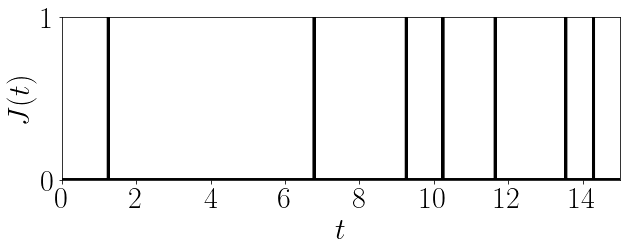

In [5]:
fig = plt.figure(figsize=(10, 3))

plt.plot(t[t<tfi], pm[t<tfi], linewidth=lw, color='k')
plt.plot(t[t<tfi], pp[t<tfi], linewidth=lw, color='k')

# plt.plot(t[t<tfi], pet[t<tfi], linewidth=lw, color='k')

# plt.plot(t[t<tfi], 0.5*np.cos(np.pi*t)[t<tfi] + 0.5, color='k', linewidth=lw)

plt.xticks(np.arange(0, 18, 2), fontsize=fs)
plt.yticks(np.arange(0, 2, 1), fontsize=fs)
plt.xlabel(r'$t$', fontsize=fs)
plt.ylabel(r'$J(t)$', fontsize=fs)
plt.xlim([0, tfi])
plt.ylim([0,1])

plt.show()

# fig.savefig('click.png', bbox_inches='tight', dpi=300)

# Compute power spectrum and 2 time correlation function

In [6]:
τ = np.linspace(0, 7, 100)
Ft =TwoTimeCorrelationSS(H, τ, c_ops, ρ0, c_ops, [-1,1], method='PD')
# Fc2t = np.real(correlation_2op_1t(H, ρ0, τ, c_ops, c2.dag()*c2, c2*c2.dag()))

# Ft = Fc1t - Fc2t

# Compute numerical PS with average over 1/dt
avg = 20
ωs, S = PowerSpectrum((pp-pm)/dt, dt, avg)


# Compute analytic PS 
ω0 =10
dω = 0.011
ω = np.arange(-ω0, ω0, dω)

Sω = FCSPowerSpectrumLinear(H, c_ops, ρ0, ω, c_ops, [-1, 1], method='PD')

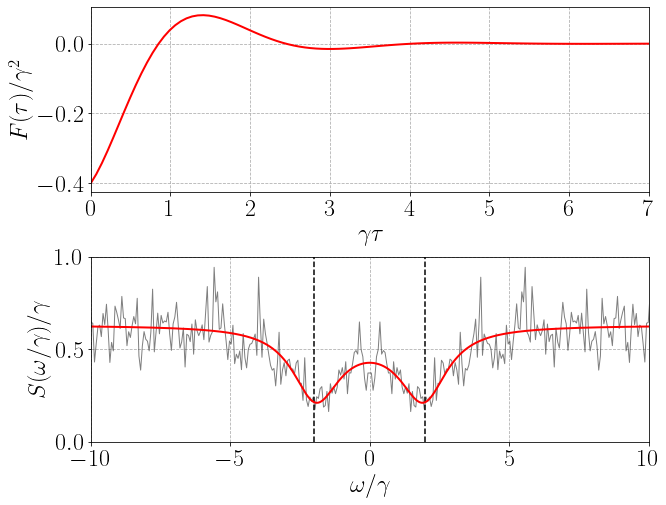

In [11]:
fig = plt.figure(figsize=(10,8))

fs=24


plt.subplot(2,1,1)
plt.plot(τ, Ft, color='r', linewidth=2)

plt.xlim([0, 7])
# plt.ylim([0.1,0.6])

plt.grid(True, linestyle='--')

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.xlabel(r'$\gamma \tau$', fontsize=fs)
plt.ylabel(r'$F(\tau)/\gamma^{2}$', fontsize=fs)

# plt.vlines(np.pi/2,-1, 1)


plt.subplot(2,1,2)
plt.plot(ωs, S, color='k', linewidth=1, alpha=0.5)
plt.plot(ω, Sω, color='r', linewidth=2)

plt.vlines(2*eigs[0], 0, 1, linestyle='--', color='k')
plt.vlines(2*eigs[1], 0, 1,  linestyle='--', color='k')

plt.xlim([-10, 10])
plt.ylim([0.0,1])

plt.grid(True, linestyle='--')

# plt.xticks([-10, -5, -2, 2,  5, 10], [r'$-10$', r'$-5$', r'$-2\Omega$', r'$2\Omega$', r'$5$', r'$10$'], fontsize=fs)
plt.xticks(np.linspace(-10, 10, 5), fontsize=fs)
plt.yticks(fontsize=fs)

plt.xlabel(r'$\omega/\gamma$', fontsize=fs)
plt.ylabel(r'$S(\omega/\gamma)/\gamma$', fontsize=fs)


plt.subplots_adjust(wspace=0, hspace=0.35)

plt.show()

fig.savefig('quantum_jump_example_qubit_FS_2.png', bbox_inches='tight', dpi=300)

In [8]:
τ = np.linspace(0, 7, 100)

μ = np.array([1, -1])


def TwoTimeCorrelationSS(H, t, c_ops, ρ, m_ops, μ, method='PD'):
    
    # Get dimension of Hilbert space
    N = ρ.shape[0]
    
    # Turn μ into numpy array
    μ = np.array(μ)
    ρvec = operator_to_vector(ρ)
    Ivec = operator_to_vector(Qobj(identity(N), dims=ρ.dims))

    ℒ = liouvillian(H, c_ops)
    ℒ1 = jump_ops(m_ops, method)

    # Compute measurement operators
    Lα = sum([μ[i]*ℒ1[i] for i in range(len(m_ops))])

    # Compute average current
    Jα = np.array([np.real((Ivec.trans() * ℒ1i * ρvec)[0,0]) for ℒ1i in ℒ1])

    Ft = np.array([np.real((Ivec.trans() * Lα* (ℒ*ti).expm() * Lα * ρvec)[0,0]) for ti in t]) - np.sum(μ * Jα)**2 

    return Ft

In [10]:
# Lα = [μ[i]*ℒ1[i] for i in range(len(m_ops))]

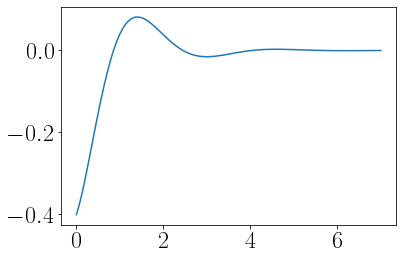

In [11]:
test = TwoTimeCorrelationSS(H, τ, c_ops, ρ0, c_ops, [-1,1], method='PD')
plt.plot(τ, test)

In [12]:
def TwoTimeCorrelation(x, dt, t0, tf, averaging=1, overlap=0.3):
    d = len(x)
    
    if averaging==1:
        k = d
    else:
        k = int(np.floor(2*d/(2*averaging - 1)))

    if k%2 != 0:
        k = k-1
    
    τ = np.linspace(t0, tf, k) 

    # Define partition function like Mathematics
    def Partition(x, n, offset):
        ix = int(np.floor((len(x)-k)/offset + 1))
        xs = np.zeros((ix, k))

        ki = 0
        i = 0
        while i < ix:
            xs[i,:] = x[ki:ki+k]

            ki += int(offset)
            i+=1

        return xs

    xs = Partition(x, k, int(np.floor(overlap*k)))
    xf = np.array([xi[:k] - np.mean(xi) for xi in xs])
    # Ft = np.mean(np.array([xfi for xfi in xf]),axis=0)
    
    return τ, xf

In [13]:
tt, ft = TwoTimeCorrelation((pp-pm)/dt, dt, 0, tf, 1)

It = (pp-pm)/dt

avg = np.mean(It)
np.shape(ft)




(1, 2000000)

# Make probability distributons over time 

In [14]:
γ = 1
Ω = 1
Δ = 0
N = 0.2

sx = sigmax()
sy = sigmay()
sz = sigmaz()
sm = sigmam()
sp = sigmap()
pe = (1+sz)/2

H =0.5* Δ*sz + Ω*sx
c_ops = [np.sqrt(γ*(N+1))*sm, np.sqrt(γ*N)*sp]
e_ops = [pe]

ρ0 = steadystate(H, c_ops)
pess = expect(ρ0, sp*sm)
print(N - (2*N+1)*pess)


-0.4016064257028113


In [15]:
ntraj = 500


t_list = [5, 15, 30, 50]
counts = np.zeros((len(t_list), ntraj))

for iy, tf in enumerate(t_list):

    dt = 0.05;
    t = np.arange(0, tf, dt)

    for ix in range(ntraj):
        result = photocurrent_mesolve(H, fock_dm(2,0), t, sc_ops=c_ops, e_ops=e_ops, store_measurement=True)

        J = np.real(result.measurement[0].T[0])
        pet = result.expect[0]

        # Get arrows
        pp = np.real(result.measurement[0].T[1])*dt
        pm = np.real(result.measurement[0].T[0])*dt


        counts[iy, ix] = np.sum(pp-pm)

Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time:   0.00s
Total run time: 

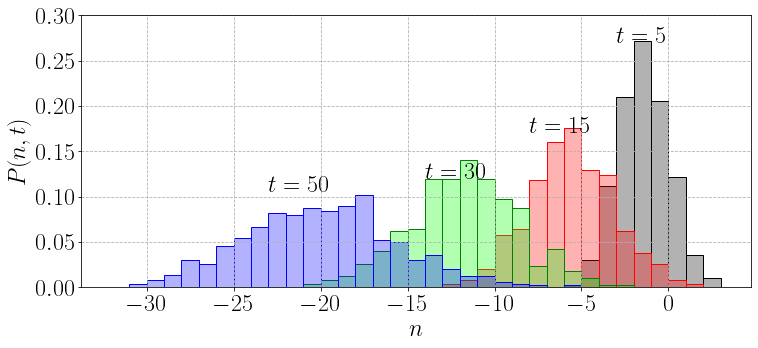

In [16]:
w = 1
bins = bins=np.arange(-32, 3+w, w)

alp = 0.3

fig = plt.figure(figsize=(12, 5))
plt.hist(counts[0], bins=bins, color=[0, 0, 0, alp], density=True, ec = 'k')
plt.hist(counts[1], bins=bins, color=[1, 0, 0, alp], density=True, ec = 'r')
plt.hist(counts[2], bins=bins, color=[0, 1, 0, alp], density=True, ec = 'g')
plt.hist(counts[3], bins=bins, color=[0, 0, 1, alp], density=True, ec = 'b')

plt.yticks(np.arange(0, 0.35, 0.05))

plt.grid(True, linestyle='--')

plt.xlabel(r'$n$')
plt.ylabel(r'$P(n, t)$')

plt.text(-3, 0.27, r'$t=5$')
plt.text(-8, 0.17, r'$t=15$')
plt.text(-14, 0.12, r'$t=30$')
plt.text(-23, 0.105, r'$t=50$')

plt.show()

# fig.savefig('Pnt.png', bbox_inches='tight', dpi=200)

In [17]:
def tilted_liouvillian(H, L, chi, v):
    
    # Only works for one jump operator
    
    H_vec = spre(H) - spost(H)
    L_vec = np.exp(1j*chi*v)*to_super(L) - 0.5*(spre(L.dag() * L) + spost(L.dag()*L))
    
    return -1j*H_vec + L_vec

In [ ]:
# Create chi space
chi = np.linspace(-np.pi, np.pi, 100)
dchi = chi[1]-chi[0]

t = [5, 10, 20, 30]

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(H, L, i, 1) for i in chi]
rhochi = [[vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rhochi])